In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
import statistics
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.metrics import confusion_matrix,f1_score, accuracy_score as acc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
C:\Users\VISHAL SINGH\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
new_data = pd.read_csv("DLBCL.csv")
print(new_data.shape)

(79, 7071)


## 1. Mutual Info[F1] 
## 2. F Classif[F2] 
## 3.T-Test[F3]

## (c) 1. F3( N features ) → F1( 2N/3 features out of selected features from F3) →    
##           F2(N/3 features out of selected features from F1)

# Preprocessing

In [3]:
df = new_data.iloc[2:,:] # Removes first two tubles
print(df[df.columns[-1]].unique())
#Categorical to Numerical Data Conversion
df[df.columns[-1]] = pd.factorize(df[df.columns[-1]])[0]
print('Updated value of target class : '+str(df[df.columns[-1]].unique()))


['DLBCL' 'FL']
Updated value of target class : [0 1]


In [4]:
print('Required data set ')
df.head()

Required data set 


,A28102,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000449_at,AB000450_at,AB000460_at,AB000462_at,AB000464_at,...,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at,class
2,-1,-45,176,97,-57,233,265,945,56,819,...,1036,-161,1523,-72,897,366,3,76,-28,0
3,25,-17,531,353,122,155,209,1688,42,639,...,4254,-75,6056,-68,737,81,-4,41,-45,0
4,73,91,257,80,614,507,760,2252,196,863,...,1934,-129,2901,-9,946,450,38,164,-62,0
5,267,41,202,138,198,355,245,1469,170,384,...,2469,93,2465,-119,339,321,-63,73,-13,0
6,16,24,187,39,145,254,571,930,-11,439,...,608,-39,1667,-87,721,213,15,155,-26,0


In [5]:
df.isnull().sum()

A28102         0
AB000114_at    0
AB000115_at    0
AB000220_at    0
AB000409_at    0
              ..
Z17240_at      0
L49218_f_at    0
M71243_f_at    0
Z78285_f_at    0
class          0
Length: 7071, dtype: int64

In [6]:
feature_set = df.drop(df.columns[-1], 1)
feature_name=list(feature_set)
print('Feature names : '+str(feature_name))

Feature names : ['A28102', 'AB000114_at', 'AB000115_at', 'AB000220_at', 'AB000409_at', 'AB000449_at', 'AB000450_at', 'AB000460_at', 'AB000462_at', 'AB000464_at', 'AB000466_at', 'AB000467_at', 'AB000468_at', 'AB000584_at', 'AB000895_at', 'AB000896_at', 'AB000897_at', 'AB000905_at', 'AB001106_at', 'AB001325_at', 'AB002314_at', 'AB002315_at', 'AB002318_at', 'AB002365_at', 'AB002366_at', 'AB002380_at', 'AB002382_at', 'AB002409_at', 'AB002559_at', 'AB003102_at', 'AB003103_at', 'AB003177_at', 'AB003698_at', 'AB004884_at', 'AB006190_at', 'AC000061_cds2_at', 'AC000061_cds3_at', 'AC000062_at', 'AC000064_cds1_at', 'AC000064_cds2_at', 'AC000066_at', 'AC000099_at', 'AC000115_cds1_at', 'AC002045_xpt1_at', 'AC002073_cds1_at', 'AC002077_at', 'AC002086_at', 'AC002115_cds1_at', 'AC002115_cds3_at', 'AC002115_cds4_at', 'AC002115_rna2_at', 'AC002450_at', 'AC002464_at', 'AC002486_at', 'AD000092_cds1_at', 'AD000092_cds2_at', 'AD000684_cds1_at', 'AD001527_cds1_at', 'AF000177_at', 'AF000231_at', 'AF000234_at'

In [7]:
feature_set.head()

,A28102,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000449_at,AB000450_at,AB000460_at,AB000462_at,AB000464_at,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
2,-1,-45,176,97,-57,233,265,945,56,819,...,132,1036,-161,1523,-72,897,366,3,76,-28
3,25,-17,531,353,122,155,209,1688,42,639,...,147,4254,-75,6056,-68,737,81,-4,41,-45
4,73,91,257,80,614,507,760,2252,196,863,...,169,1934,-129,2901,-9,946,450,38,164,-62
5,267,41,202,138,198,355,245,1469,170,384,...,13,2469,93,2465,-119,339,321,-63,73,-13
6,16,24,187,39,145,254,571,930,-11,439,...,69,608,-39,1667,-87,721,213,15,155,-26


In [8]:
target_feature = df[df.columns[-1]]
target_feature.head()

2    0
3    0
4    0
5    0
6    0
Name: class, dtype: int64

In [9]:
temp_feature_set=StandardScaler().fit_transform(feature_set)
scaled_feature_set = pd.DataFrame(temp_feature_set, columns=feature_name)
scaled_feature_set.head()

,A28102,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000449_at,AB000450_at,AB000460_at,AB000462_at,AB000464_at,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
0,-0.730817,-0.292937,-0.431595,-0.567503,-0.809531,-0.456305,-0.293827,-0.784873,-0.384965,0.213520,...,-0.469899,-0.282291,0.190071,-0.188077,0.520833,0.141759,0.384881,0.518999,0.206599,0.584699
1,-0.570425,-0.117207,0.149112,0.973353,-0.130132,-0.755853,-0.542402,0.134863,-0.448168,-0.154563,...,-0.355832,3.320297,0.446154,1.934349,0.534848,-0.065095,-0.553796,0.492245,0.059613,0.525299
2,-0.274317,0.560607,-0.299096,-0.669825,1.737265,0.595954,1.903393,0.833021,0.247067,0.303496,...,-0.188533,0.723030,0.285358,0.457126,0.741570,0.205108,0.661544,0.652770,0.576164,0.465899
3,0.922455,0.246804,-0.389065,-0.320725,0.158327,0.012219,-0.382604,-0.136230,0.129690,-0.676015,...,-1.374836,1.321969,0.946409,0.252983,0.356156,-0.579645,0.236669,0.266747,0.194000,0.637111
4,-0.625946,0.140111,-0.413602,-0.916603,-0.042835,-0.375657,1.064455,-0.803441,-0.687438,-0.563545,...,-0.948983,-0.761442,0.553352,-0.120654,0.468276,-0.085781,-0.119040,0.564864,0.538367,0.591687


# Training and Spilting of Data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(scaled_feature_set, target_feature, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((61, 7070), (16, 7070))

In [11]:
y_train.shape, y_test.shape

((61,), (16,))

In [12]:
columns = feature_set.shape[1]

number_of_features_required_1 = 2*(columns/3)
number_of_features_required_2 = columns/3
number_of_features_required_3 = 0.19*columns
print('number_of_features_required_1 : '+str(number_of_features_required_1))
print('number_of_features_required_2 : '+str(number_of_features_required_2))
print('number_of_features_required_3 : '+str(number_of_features_required_3))

number_of_features_required_1 = int(number_of_features_required_1)
number_of_features_required_2 = int(number_of_features_required_2)
number_of_features_required_3 = int(number_of_features_required_3)

print('number_of_features_required_1 in integers: '+str(number_of_features_required_1))
print('number_of_features_required_2 in integers: '+str(number_of_features_required_2))
print('number_of_features_required_3 in integers: '+str(number_of_features_required_3))

number_of_features_required_1 : 4713.333333333333
number_of_features_required_2 : 2356.6666666666665
number_of_features_required_3 : 1343.3
number_of_features_required_1 in integers: 4713
number_of_features_required_2 in integers: 2356
number_of_features_required_3 in integers: 1343


# Feature Selection Using T-Test

In [17]:
start_time_t = time.time()
x= df.values                # It is converting df into numpy arrray

a,b = x.shape              # Here, a is taking row and b is taking columns 

n1 =0;
n2 = 0;

for i in range(a):      
    if x[i][b-1] == 1:
        n1+=1;
    else:
        n2+=1;


sample_1 = []
sample_2= []
tval=[]

# It is calculating t value

for j in range(1,b-1):      
    for i in range(a):

        if x[i][b-1]== 1:           
            sample_1.append(x[i][j])
        else:
            sample_2.append(x[i][j])


# It is converting sample values from string to integer
    sample_1 = list(map(int,sample_1))       
    sample_2 = list(map(int,sample_2))


    s1_bar = statistics.mean(sample_1)          
    s2_bar = statistics.mean(sample_2)

    s1_var = statistics.variance(sample_1)      
    s2_var = statistics.variance(sample_2)



    t = abs(s1_bar - s2_bar)/np.sqrt(s1_var/n1+s2_var/n2)         # It is calculating t value by comparing mean and variance using given formula

    tval.append(t)       

    sample_1.clear()      
    sample_2.clear()



new_index=[]

new_index = sorted(range(len(tval)), key=lambda k: tval[k])   

new_index.reverse()     

required_features_t = new_index[:number_of_features_required_1]  #It is selecting important features
print('Time taken by T Test is :'+str(time.time() - start_time_t)+' seconds')

Time taken by T Test is :9.577417373657227 seconds


In [18]:
print(required_features_t)

[3967, 6118, 4231, 1031, 1291, 1982, 6754, 2060, 5821, 773, 544, 1757, 1049, 1729, 4311, 1419, 2927, 1127, 4141, 4055, 4122, 5874, 5933, 521, 4402, 445, 1799, 4097, 911, 5219, 2700, 2944, 142, 380, 377, 2728, 4485, 1369, 3102, 4424, 3326, 241, 1071, 5937, 3757, 1312, 4279, 1719, 6130, 1308, 3963, 6925, 6301, 2076, 4092, 2245, 2880, 5895, 955, 4519, 1764, 324, 3675, 1643, 312, 5016, 4269, 1115, 3400, 2868, 1672, 1630, 6463, 2325, 314, 3696, 262, 167, 3826, 1842, 2858, 5533, 2331, 3290, 4533, 6316, 2876, 1762, 102, 214, 5193, 4069, 6049, 579, 344, 2084, 3578, 2033, 3187, 221, 5539, 1156, 4181, 130, 3632, 1285, 5241, 1058, 1333, 379, 5275, 110, 2221, 4072, 477, 4363, 4442, 1873, 2050, 5643, 2322, 1112, 4506, 6413, 5108, 4693, 6234, 2360, 2124, 4312, 4326, 4212, 3076, 1418, 3949, 5962, 3196, 1881, 3438, 3120, 5126, 2319, 5348, 2607, 2822, 2584, 1969, 2258, 4441, 3867, 6598, 5518, 1560, 4049, 4392, 6615, 1743, 3249, 139, 5605, 5898, 3926, 2358, 3433, 1490, 2116, 6291, 531, 5989, 6488, 3222,

In [19]:
df1 = df.iloc[:,required_features_t]
selected_features_tt=list(df1)
print('Length of selected_features_tt : ',len(selected_features_tt))

Length of selected_features_tt :  4713


In [20]:
print('selected_features_tt :',selected_features_tt)

selected_features_tt : ['X01715_at', 'U59058_s_at', 'X56468_at', 'J03890_rna1_at', 'L17128_at', 'M57609_at', 'D90042_at', 'M62994_at', 'HG4155-HT4425_s_at', 'HG2274-HT2370_at', 'D82346_at', 'M22324_at', 'J04164_at', 'M20218_at', 'X62055_at', 'L33801_at', 'U28369_at', 'L02321_at', 'X17576_at', 'X12433_at', 'X16354_at', 'V00594_at', 'M27968_s_at', 'D79996_at', 'X67734_at', 'D55696_at', 'M25629_at', 'X15088_at', 'HG4073-HT4343_at', 'J00220_cds4_at', 'U12535_at', 'U29656_at', 'D13630_at', 'D44466_at', 'D43949_at', 'U14417_at', 'X74795_at', 'L25851_at', 'U40343_at', 'X69398_at', 'U53225_at', 'D25303_at', 'J04982_at', 'J04617_s_at', 'U81262_at', 'L19605_at', 'X59812_at', 'M19507_at', 'M36429_s_at', 'L19401_at', 'X01059_at', 'U04241_at', 'Z31690_s_at', 'M63623_at', 'X14830_at', 'M86667_at', 'U24576_at', 'U50327_s_at', 'HG4704-HT5146_at', 'X76498_at', 'M22638_at', 'D38047_at', 'U78524_at', 'M13755_at', 'D31886_at', 'Z21707_at', 'X59434_at', 'K03474_at', 'U59302_at', 'U23070_at', 'M15182_at', '

In [21]:
X_train1 = X_train.iloc[:,required_features_t]
X_train1.head()

,X01715_at,U59058_s_at,X56468_at,J03890_rna1_at,L17128_at,M57609_at,D90042_at,M62994_at,HG4155-HT4425_s_at,HG2274-HT2370_at,...,U05681_s_at,X69116_s_at,M28585_f_at,U42390_at,M58378_cds1_at,J02923_at,M63438_s_at,D80010_at,U01147_at,U91985_at
22,-0.350835,-0.110009,-0.315775,-0.835800,-1.084875,-0.494323,-0.157280,-0.449745,-0.302754,0.071092,...,-1.249526,0.790572,0.476420,-0.424593,-0.559175,0.503199,-1.534148,-0.837360,0.038231,0.203870
41,-1.422374,-0.844870,0.856985,0.273518,-0.387998,-1.658498,-0.650150,-0.708478,1.257805,-0.209129,...,0.477802,-0.624356,-1.070511,0.861701,-0.329761,0.159490,0.605517,1.339743,-0.117909,1.284285
50,0.530307,1.091055,0.411452,-0.053226,-0.470424,-0.070987,0.556879,-0.403306,0.410094,-0.007109,...,-0.372261,0.420762,-0.076055,-0.084488,0.531132,-0.001312,0.759445,-0.568374,0.491420,-0.224294
38,2.230600,2.758321,-0.686574,-0.831766,3.223777,2.431677,0.466352,1.381286,-0.476149,-0.564293,...,2.244573,3.009438,0.678995,-1.479791,2.191424,-1.074479,0.012382,-0.160693,-1.961129,-2.197050
61,1.110354,3.627511,-1.354875,1.039956,2.631805,3.178741,1.240863,0.074354,-2.402766,-1.299058,...,0.832788,-2.167914,-1.088926,-1.693446,0.710878,-1.032003,2.496435,-1.547650,-2.006829,-1.572811


# Selection of features using Mutual Information 

In [22]:
from scipy.special import digamma
def mutual_info(data,x_index,target):
  x=data[x_index]
  y=target
 
  combo_d= np.vstack((x,y)).T # It is Combining the data values
  
  n=len(x)
  n_x=[]
  unique_y=len(set(y))
 
  for i in range(unique_y):
    n_x.append([]) 
  for item in combo_d:
    index=int(item[1])
    n_x[index].append(item)
  I_i=np.zeros(len(x))
  indx=0
  for pt in combo_d:
    distx=[]
    
    #Calculating distance of a point with all other points in the same class
    for pt_c in n_x[int(pt[1])]:
      if pt_c[0]==pt[0]:
        continue
      distx.append(abs(pt_c[0]-pt[0]))
    distx.sort()
  
    k=2
    kth_dist_c=distx[k-1]
    dist=[]
    
    #Calculating distance of a point with all other points in the data set
    for pt_all in combo_d:
      if pt_all[0]==pt[0] and pt_all[1]==pt[1]:
        continue
      dist.append(abs(pt_all[0]-pt[0]))

    m_i=0
    for i in range(len(dist)):
      if dist[i]<=kth_dist_c:
        m_i+=1
 
    n_x_i=len(n_x[int(pt[1])])
   
    I_i[indx]=digamma(n)-digamma(n_x_i)+digamma(k)-digamma(m_i)
    indx+=1
  mutual_info_xy=np.sum(I_i)/n
  return abs(mutual_info_xy)
  

In [23]:
X_train_tp=X_train1.values.transpose()
mi_start_time = time.time()

total_features=len(required_features_t)

mutual_information= np.zeros(total_features)
for i in range(total_features):
  mutual_information[i]=mutual_info(X_train_tp,i,y_train)
  print('Mutual Information between Target Class and Feature_'+feature_name[i]+' : ',mutual_information[i])
    
print('Time taken by Mutual Information is :'+str(time.time() - mi_start_time)+' seconds')

Mutual Information between Target Class and Feature_A28102 :  0.021793681163935832
Mutual Information between Target Class and Feature_AB000114_at :  0.07472167302635392
Mutual Information between Target Class and Feature_AB000115_at :  0.07020184229926305
Mutual Information between Target Class and Feature_AB000220_at :  0.14493636524979367
Mutual Information between Target Class and Feature_AB000409_at :  0.12563254025833978
Mutual Information between Target Class and Feature_AB000449_at :  0.029131254105388596
Mutual Information between Target Class and Feature_AB000450_at :  0.04772394397944455
Mutual Information between Target Class and Feature_AB000460_at :  0.042774338159412915
Mutual Information between Target Class and Feature_AB000462_at :  0.1636446091838483
Mutual Information between Target Class and Feature_AB000464_at :  0.16287591071502341
Mutual Information between Target Class and Feature_AB000466_at :  0.05274729039623359
Mutual Information between Target Class and Fe

Mutual Information between Target Class and Feature_D00591_at :  0.01654501193008671
Mutual Information between Target Class and Feature_D00596_at :  0.10490185928175716
Mutual Information between Target Class and Feature_D00632_at :  0.11073024382023662
Mutual Information between Target Class and Feature_D00654_at :  0.10212154295620629
Mutual Information between Target Class and Feature_D00723_at :  0.04294233418683357
Mutual Information between Target Class and Feature_D00726_at :  0.0894974094510778
Mutual Information between Target Class and Feature_D00760_at :  0.11037131482353671
Mutual Information between Target Class and Feature_D00761_at :  0.03761148730837974
Mutual Information between Target Class and Feature_D00762_at :  0.06977188185872792
Mutual Information between Target Class and Feature_D00763_at :  0.18850182853753028
Mutual Information between Target Class and Feature_D10202_at :  0.07373957555894967
Mutual Information between Target Class and Feature_D10495_at :  0

Mutual Information between Target Class and Feature_D16532_at :  0.22608985183222705
Mutual Information between Target Class and Feature_D16562_at :  0.0593389682993869
Mutual Information between Target Class and Feature_D16581_at :  0.001385848777889203
Mutual Information between Target Class and Feature_D16583_at :  0.006352548847200821
Mutual Information between Target Class and Feature_D16593_at :  0.041048604876302595
Mutual Information between Target Class and Feature_D16626_at :  0.060183783672738266
Mutual Information between Target Class and Feature_D16815_at :  0.07510625743587078
Mutual Information between Target Class and Feature_D17357_at :  0.10026650615315429
Mutual Information between Target Class and Feature_D17390_at :  0.05280968246682239
Mutual Information between Target Class and Feature_D17391_at :  0.054792089756454165
Mutual Information between Target Class and Feature_D17400_at :  0.17338097569104885
Mutual Information between Target Class and Feature_D17461_at

Mutual Information between Target Class and Feature_D31797_at :  0.049407740868710324
Mutual Information between Target Class and Feature_D31815_at :  0.10968156035228926
Mutual Information between Target Class and Feature_D31846_at :  0.06126047575368126
Mutual Information between Target Class and Feature_D31883_at :  0.092725185906916
Mutual Information between Target Class and Feature_D31884_at :  0.18360101021448896
Mutual Information between Target Class and Feature_D31885_at :  0.1528334747037294
Mutual Information between Target Class and Feature_D31886_at :  0.03924139032195532
Mutual Information between Target Class and Feature_D31887_at :  0.018990166453853166
Mutual Information between Target Class and Feature_D31888_at :  0.0654739328128868
Mutual Information between Target Class and Feature_D31890_at :  0.0682168828642527
Mutual Information between Target Class and Feature_D31891_at :  0.09297586873956601
Mutual Information between Target Class and Feature_D31897_at :  0.1

Mutual Information between Target Class and Feature_D50402_at :  0.09640394737162315
Mutual Information between Target Class and Feature_D50487_at :  0.034743179061448984
Mutual Information between Target Class and Feature_D50495_at :  0.08393195103833725
Mutual Information between Target Class and Feature_D50525_at :  0.03251099462770177
Mutual Information between Target Class and Feature_D50532_at :  0.23539692624314157
Mutual Information between Target Class and Feature_D50582_at :  0.2135452339303087
Mutual Information between Target Class and Feature_D50640_at :  0.06531896703560819
Mutual Information between Target Class and Feature_D50645_at :  0.05588571718109716
Mutual Information between Target Class and Feature_D50663_at :  0.037685553408267104
Mutual Information between Target Class and Feature_D50678_at :  0.1390356604960791
Mutual Information between Target Class and Feature_D50683_at :  0.038878319876917644
Mutual Information between Target Class and Feature_D50692_at : 

Mutual Information between Target Class and Feature_D79994_at :  0.10267975774673374
Mutual Information between Target Class and Feature_D79995_at :  0.05618003706668517
Mutual Information between Target Class and Feature_D79996_at :  0.12979464398996307
Mutual Information between Target Class and Feature_D79997_at :  0.015060880485707775
Mutual Information between Target Class and Feature_D79998_at :  0.0874702859798849
Mutual Information between Target Class and Feature_D79999_at :  0.0873384783479504
Mutual Information between Target Class and Feature_D80001_at :  0.038407706701386435
Mutual Information between Target Class and Feature_D80002_at :  0.11413498948681507
Mutual Information between Target Class and Feature_D80003_at :  0.24067466187940878
Mutual Information between Target Class and Feature_D80004_at :  0.08194313839378689
Mutual Information between Target Class and Feature_D80005_at :  0.00788230324580771
Mutual Information between Target Class and Feature_D80006_at :  

Mutual Information between Target Class and Feature_D87023_cds2_at :  0.039356918562007764
Mutual Information between Target Class and Feature_D87024_at :  0.0975617200467288
Mutual Information between Target Class and Feature_D87071_at :  0.18859648218804834
Mutual Information between Target Class and Feature_D87073_at :  0.008783726303054563
Mutual Information between Target Class and Feature_D87074_at :  0.044006543519410544
Mutual Information between Target Class and Feature_D87075_at :  0.1197577108480459
Mutual Information between Target Class and Feature_D87076_at :  0.12481315713423145
Mutual Information between Target Class and Feature_D87077_at :  0.031312445324168436
Mutual Information between Target Class and Feature_D87078_at :  0.13699388787862724
Mutual Information between Target Class and Feature_D87116_at :  0.09383350381851262
Mutual Information between Target Class and Feature_D87119_at :  0.024584615196480843
Mutual Information between Target Class and Feature_D8712

Mutual Information between Target Class and Feature_HG1139-HT4910_at :  0.05886899200973848
Mutual Information between Target Class and Feature_HG1148-HT1148_at :  0.03745018088850865
Mutual Information between Target Class and Feature_HG1153-HT1153_at :  0.08201922520095531
Mutual Information between Target Class and Feature_HG1155-HT4822_at :  0.03497541862941183
Mutual Information between Target Class and Feature_HG1205-HT1205_at :  0.06650424586349939
Mutual Information between Target Class and Feature_HG142-HT142_at :  0.13411164907355386
Mutual Information between Target Class and Feature_HG1602-HT1602_at :  0.1817313982737841
Mutual Information between Target Class and Feature_HG1604-HT1604_at :  0.01452291750222402
Mutual Information between Target Class and Feature_HG1612-HT1612_at :  0.2122670283995782
Mutual Information between Target Class and Feature_HG1614-HT1614_at :  0.1338939198527651
Mutual Information between Target Class and Feature_HG1649-HT1652_at :  0.02406947913

Mutual Information between Target Class and Feature_HG3132-HT3308_at :  0.11162518390527464
Mutual Information between Target Class and Feature_HG3137-HT3313_at :  0.05352854966097254
Mutual Information between Target Class and Feature_HG315-HT315_at :  0.11217925856735317
Mutual Information between Target Class and Feature_HG3162-HT3339_at :  0.04078959872542718
Mutual Information between Target Class and Feature_HG3175-HT3352_at :  0.032724462586520536
Mutual Information between Target Class and Feature_HG3214-HT3391_at :  0.01666747061688807
Mutual Information between Target Class and Feature_HG3227-HT3404_at :  0.044016415939757005
Mutual Information between Target Class and Feature_HG3231-HT3408_at :  0.08672785900794976
Mutual Information between Target Class and Feature_HG3248-HT3425_at :  0.06398649949329396
Mutual Information between Target Class and Feature_HG3254-HT3431_at :  0.047974089905667455
Mutual Information between Target Class and Feature_HG3255-HT3432_at :  0.02010

Mutual Information between Target Class and Feature_HG4310-HT4580_at :  0.11383936985861198
Mutual Information between Target Class and Feature_HG4316-HT4586_at :  0.01831200533414046
Mutual Information between Target Class and Feature_HG4319-HT4589_at :  0.09346431726135225
Mutual Information between Target Class and Feature_HG4321-HT4591_at :  0.005822219240080885
Mutual Information between Target Class and Feature_HG4332-HT4602_at :  0.10391147483965738
Mutual Information between Target Class and Feature_HG4333-HT4603_at :  0.03857731406376933
Mutual Information between Target Class and Feature_HG4336-HT4606_at :  0.1253319846092709
Mutual Information between Target Class and Feature_HG4390-HT4660_at :  0.03246704950178942
Mutual Information between Target Class and Feature_HG4411-HT4681_at :  0.0704443346913848
Mutual Information between Target Class and Feature_HG4433-HT4703_at :  0.09616637800529228
Mutual Information between Target Class and Feature_HG4458-HT4727_at :  0.0334632

Mutual Information between Target Class and Feature_J03798_at :  0.045171821457304466
Mutual Information between Target Class and Feature_J03810_at :  0.17126505289929744
Mutual Information between Target Class and Feature_J03824_at :  0.13483913819469415
Mutual Information between Target Class and Feature_J03827_at :  0.05754912094541229
Mutual Information between Target Class and Feature_J03890_rna1_at :  0.01234937825390603
Mutual Information between Target Class and Feature_J03909_at :  0.09882962336381246
Mutual Information between Target Class and Feature_J03925_at :  0.051334563778588936
Mutual Information between Target Class and Feature_J03930_at :  0.02952553411538993
Mutual Information between Target Class and Feature_J04027_at :  0.09270435963593715
Mutual Information between Target Class and Feature_J04031_at :  0.024348207693872217
Mutual Information between Target Class and Feature_J04040_at :  0.09086813334214096
Mutual Information between Target Class and Feature_J0405

Mutual Information between Target Class and Feature_L02320_at :  0.0019125988948032228
Mutual Information between Target Class and Feature_L02321_at :  0.23888969283911027
Mutual Information between Target Class and Feature_L02426_at :  0.05071793630116874
Mutual Information between Target Class and Feature_L02547_at :  0.24373616694787947
Mutual Information between Target Class and Feature_L02648_at :  0.042159596437009624
Mutual Information between Target Class and Feature_L02785_at :  0.06209929995316119
Mutual Information between Target Class and Feature_L02840_at :  0.0250252575090352
Mutual Information between Target Class and Feature_L02867_at :  0.09327369681327817
Mutual Information between Target Class and Feature_L02932_at :  0.12335455698697985
Mutual Information between Target Class and Feature_L02950_at :  0.08690556585498331
Mutual Information between Target Class and Feature_L03427_at :  0.12355005320719313
Mutual Information between Target Class and Feature_L03532_at :

Mutual Information between Target Class and Feature_L11285_at :  0.21666013074350016
Mutual Information between Target Class and Feature_L11329_at :  0.13525675029238593
Mutual Information between Target Class and Feature_L11353_at :  0.17057434039541472
Mutual Information between Target Class and Feature_L11369_at :  0.004249014755809261
Mutual Information between Target Class and Feature_L11370_at :  0.0615165523346238
Mutual Information between Target Class and Feature_L11372_at :  0.19715126308079806
Mutual Information between Target Class and Feature_L11373_at :  0.004867773826961364
Mutual Information between Target Class and Feature_L11566_at :  0.02100334958514567
Mutual Information between Target Class and Feature_L11573_at :  0.09845522944431088
Mutual Information between Target Class and Feature_L11669_at :  0.02579445474387221
Mutual Information between Target Class and Feature_L11695_at :  0.07163530129244125
Mutual Information between Target Class and Feature_L11708_at : 

Mutual Information between Target Class and Feature_L20773_at :  0.08592999315809914
Mutual Information between Target Class and Feature_L20814_at :  0.1974229083601833
Mutual Information between Target Class and Feature_L20815_at :  0.04284287331968538
Mutual Information between Target Class and Feature_L20826_at :  0.18385640222172828
Mutual Information between Target Class and Feature_L20852_at :  0.02060203956122711
Mutual Information between Target Class and Feature_L20859_at :  0.006761386397881955
Mutual Information between Target Class and Feature_L20861_at :  0.06303574429001378
Mutual Information between Target Class and Feature_L20941_at :  0.002813946187133569
Mutual Information between Target Class and Feature_L20971_at :  0.07723295249384533
Mutual Information between Target Class and Feature_L21715_at :  0.004571206543089965
Mutual Information between Target Class and Feature_L21893_at :  0.16659112629889303
Mutual Information between Target Class and Feature_L21934_at :

Mutual Information between Target Class and Feature_L34600_at :  0.08711753781842743
Mutual Information between Target Class and Feature_L34657_at :  0.12208460653670153
Mutual Information between Target Class and Feature_L34673_at :  0.25088428545945823
Mutual Information between Target Class and Feature_L34820_at :  0.01965276652302123
Mutual Information between Target Class and Feature_L34838_at :  0.054519584586560525
Mutual Information between Target Class and Feature_L35035_at :  0.05555619386422468
Mutual Information between Target Class and Feature_L35240_at :  0.03228131991871113
Mutual Information between Target Class and Feature_L35251_rna1_at :  0.002268415080061623
Mutual Information between Target Class and Feature_L35269_at :  0.05328825622463549
Mutual Information between Target Class and Feature_L35475_at :  0.14402606144838942
Mutual Information between Target Class and Feature_L35545_at :  0.04872632206111229
Mutual Information between Target Class and Feature_L35546

Mutual Information between Target Class and Feature_L41559_at :  0.2111866036812557
Mutual Information between Target Class and Feature_L41607_at :  0.15533563678130685
Mutual Information between Target Class and Feature_L41668_rna1_at :  0.10248441574811305
Mutual Information between Target Class and Feature_L41680_at :  0.1432038477594803
Mutual Information between Target Class and Feature_L41690_at :  0.005972700905724929
Mutual Information between Target Class and Feature_L41816_at :  0.03731708257742461
Mutual Information between Target Class and Feature_L41870_at :  0.07692679004583935
Mutual Information between Target Class and Feature_L41887_rna1_at :  0.06442554500576769
Mutual Information between Target Class and Feature_L41913_at :  0.08713680359827503
Mutual Information between Target Class and Feature_L41919_rna1_at :  0.03894108294248516
Mutual Information between Target Class and Feature_L41939_at :  0.006132864561047102
Mutual Information between Target Class and Featur

Mutual Information between Target Class and Feature_M20902_at :  0.0626191353090621
Mutual Information between Target Class and Feature_M20919_at :  0.1150413033050006
Mutual Information between Target Class and Feature_M21005_at :  0.03304971993926103
Mutual Information between Target Class and Feature_M21056_at :  0.04155589117192062
Mutual Information between Target Class and Feature_M21121_at :  0.0023587698033457915
Mutual Information between Target Class and Feature_M21154_at :  0.07354435309064496
Mutual Information between Target Class and Feature_M21186_at :  0.031546220368939636
Mutual Information between Target Class and Feature_M21188_at :  0.17733740883881108
Mutual Information between Target Class and Feature_M21259_at :  0.002367886687387678
Mutual Information between Target Class and Feature_M21389_at :  0.10177391699382624
Mutual Information between Target Class and Feature_M21494_at :  0.03388890328858958
Mutual Information between Target Class and Feature_M21551_rna1

Mutual Information between Target Class and Feature_M28826_at :  0.08950669455234848
Mutual Information between Target Class and Feature_M28827_at :  0.04594998933663746
Mutual Information between Target Class and Feature_M28879_at :  0.011744118663895966
Mutual Information between Target Class and Feature_M28983_at :  0.05916767374271957
Mutual Information between Target Class and Feature_M29064_at :  0.08545551317542242
Mutual Information between Target Class and Feature_M29194_at :  0.17464161446323956
Mutual Information between Target Class and Feature_M29204_at :  0.038122290842200084
Mutual Information between Target Class and Feature_M29273_at :  0.07295541819584492
Mutual Information between Target Class and Feature_M29458_at :  0.038677859644566166
Mutual Information between Target Class and Feature_M29474_at :  0.12829365034313878
Mutual Information between Target Class and Feature_M29536_at :  0.0588011252620947
Mutual Information between Target Class and Feature_M29540_at :

Mutual Information between Target Class and Feature_M36089_at :  0.010241741291707586
Mutual Information between Target Class and Feature_M36200_at :  0.08059625331561175
Mutual Information between Target Class and Feature_M36205_at :  0.18807315064976987
Mutual Information between Target Class and Feature_M36341_at :  0.07080554311506547
Mutual Information between Target Class and Feature_M36803_at :  0.047685314339649815
Mutual Information between Target Class and Feature_M37033_at :  0.21984873334745803
Mutual Information between Target Class and Feature_M37104_at :  0.04292464914948702
Mutual Information between Target Class and Feature_M37190_at :  0.09312267593542668
Mutual Information between Target Class and Feature_M37197_at :  0.09111492662172113
Mutual Information between Target Class and Feature_M37245_at :  0.083160862211787
Mutual Information between Target Class and Feature_M37400_at :  0.03996699736991204
Mutual Information between Target Class and Feature_M37435_at :  

Mutual Information between Target Class and Feature_M60922_at :  0.03707960198264351
Mutual Information between Target Class and Feature_M61156_at :  0.03977176410103517
Mutual Information between Target Class and Feature_M61176_at :  0.05418126373333248
Mutual Information between Target Class and Feature_M61199_at :  0.005805089868919128
Mutual Information between Target Class and Feature_M61733_at :  0.03329519126112903
Mutual Information between Target Class and Feature_M61764_at :  0.2055112320830496
Mutual Information between Target Class and Feature_M61906_at :  0.06415734658969291
Mutual Information between Target Class and Feature_M61916_at :  0.058372045743746936
Mutual Information between Target Class and Feature_M62302_at :  0.0593144531927777
Mutual Information between Target Class and Feature_M62324_at :  0.20037811334392425
Mutual Information between Target Class and Feature_M62397_at :  0.09843224500461323
Mutual Information between Target Class and Feature_M62400_at :  

Mutual Information between Target Class and Feature_M73720_at :  0.036771300343326326
Mutual Information between Target Class and Feature_M73780_at :  0.13398142511397484
Mutual Information between Target Class and Feature_M74002_at :  0.03691111586053329
Mutual Information between Target Class and Feature_M74047_at :  0.06956408034965053
Mutual Information between Target Class and Feature_M74089_at :  0.19197238679346115
Mutual Information between Target Class and Feature_M74091_at :  0.09674813676312799
Mutual Information between Target Class and Feature_M74093_at :  0.09723265137844786
Mutual Information between Target Class and Feature_M74096_at :  0.04461221553972037
Mutual Information between Target Class and Feature_M74099_at :  0.026593776332883474
Mutual Information between Target Class and Feature_M74161_at :  0.10863254812575363
Mutual Information between Target Class and Feature_M74290_at :  0.1146967025505638
Mutual Information between Target Class and Feature_M74297_at : 

Mutual Information between Target Class and Feature_M86707_at :  0.05594975026802017
Mutual Information between Target Class and Feature_M86737_at :  0.08792140589821797
Mutual Information between Target Class and Feature_M86752_at :  0.08513413868960908
Mutual Information between Target Class and Feature_M86808_at :  0.02118502499938885
Mutual Information between Target Class and Feature_M86826_at :  0.03496381621808572
Mutual Information between Target Class and Feature_M86849_at :  0.08488249094339441
Mutual Information between Target Class and Feature_M86852_at :  0.1131894733070761
Mutual Information between Target Class and Feature_M86868_at :  0.15424594405601721
Mutual Information between Target Class and Feature_M86917_at :  0.11593407745692311
Mutual Information between Target Class and Feature_M86934_at :  0.025092611871129225
Mutual Information between Target Class and Feature_M87284_at :  0.029263624699453157
Mutual Information between Target Class and Feature_M87338_at : 

Mutual Information between Target Class and Feature_M96944_at :  0.07636652180235028
Mutual Information between Target Class and Feature_M96980_at :  0.0796628839101878
Mutual Information between Target Class and Feature_M96982_at :  0.006626896436969613
Mutual Information between Target Class and Feature_M97287_at :  0.05322646103921179
Mutual Information between Target Class and Feature_M97388_at :  0.20161022163621403
Mutual Information between Target Class and Feature_M97496_at :  0.06487382506375189
Mutual Information between Target Class and Feature_M97639_at :  0.01125896246260515
Mutual Information between Target Class and Feature_M97675_at :  0.030793090091020762
Mutual Information between Target Class and Feature_M97815_at :  0.015045215603994865
Mutual Information between Target Class and Feature_M97856_at :  0.07632220337567887
Mutual Information between Target Class and Feature_M97925_rna1_at :  0.05653059188322206
Mutual Information between Target Class and Feature_M97936

Mutual Information between Target Class and Feature_S77812_at :  0.09260546704668778
Mutual Information between Target Class and Feature_S78085_at :  0.0663086326038857
Mutual Information between Target Class and Feature_S78187_at :  0.11827682675508529
Mutual Information between Target Class and Feature_S78203_at :  0.051154256835986955
Mutual Information between Target Class and Feature_S78296_at :  0.033993969808167025
Mutual Information between Target Class and Feature_S78432_xpt1_at :  0.08834996516933924
Mutual Information between Target Class and Feature_S78569_at :  0.02128793867942826
Mutual Information between Target Class and Feature_S78653_at :  0.14614964600070277
Mutual Information between Target Class and Feature_S78723_rna2_at :  0.06403647228916842
Mutual Information between Target Class and Feature_S79048_at :  0.06219277364231794
Mutual Information between Target Class and Feature_S79267_at :  0.08083788750199308
Mutual Information between Target Class and Feature_S7

Mutual Information between Target Class and Feature_U03270_at :  0.029709542491079738
Mutual Information between Target Class and Feature_U03272_at :  0.0262400767174396
Mutual Information between Target Class and Feature_U03274_at :  0.11155632135506133
Mutual Information between Target Class and Feature_U03398_at :  0.12324974545751222
Mutual Information between Target Class and Feature_U03399_at :  0.0018882995575819992
Mutual Information between Target Class and Feature_U03486_at :  0.1390349393164765
Mutual Information between Target Class and Feature_U03634_at :  0.049631456121306344
Mutual Information between Target Class and Feature_U03642_at :  0.04318447851701767
Mutual Information between Target Class and Feature_U03644_at :  0.015636210693197813
Mutual Information between Target Class and Feature_U03688_at :  0.11198435081515445
Mutual Information between Target Class and Feature_U03851_at :  0.005396011794929328
Mutual Information between Target Class and Feature_U03877_at

Mutual Information between Target Class and Feature_U09813_at :  0.007150320649045318
Mutual Information between Target Class and Feature_U09825_at :  0.1186699799879076
Mutual Information between Target Class and Feature_U09848_at :  0.02995646386612879
Mutual Information between Target Class and Feature_U09850_at :  0.15953638017712662
Mutual Information between Target Class and Feature_U09860_at :  0.01474189164212876
Mutual Information between Target Class and Feature_U09877_at :  0.007880181184862084
Mutual Information between Target Class and Feature_U09953_at :  0.040790802569319946
Mutual Information between Target Class and Feature_U10117_at :  0.07893905972420044
Mutual Information between Target Class and Feature_U10323_at :  0.008431677177407662
Mutual Information between Target Class and Feature_U10324_at :  0.020779008223033395
Mutual Information between Target Class and Feature_U10362_at :  0.0352857375958108
Mutual Information between Target Class and Feature_U10439_at 

Mutual Information between Target Class and Feature_U16660_at :  0.038428361990617894
Mutual Information between Target Class and Feature_U16861_at :  0.010752506710120848
Mutual Information between Target Class and Feature_U16954_at :  0.08420188530309465
Mutual Information between Target Class and Feature_U16997_at :  0.08091055980854585
Mutual Information between Target Class and Feature_U17032_at :  0.026353873378292394
Mutual Information between Target Class and Feature_U17033_at :  0.010089333598932536
Mutual Information between Target Class and Feature_U17034_at :  0.021050883197021954
Mutual Information between Target Class and Feature_U17077_at :  0.0006550065416546708
Mutual Information between Target Class and Feature_U17163_at :  0.06715954722898282
Mutual Information between Target Class and Feature_U17195_at :  0.08691674346982534
Mutual Information between Target Class and Feature_U17280_at :  0.018298701644366158
Mutual Information between Target Class and Feature_U1732

Mutual Information between Target Class and Feature_U24576_at :  0.055507758034301226
Mutual Information between Target Class and Feature_U24577_at :  0.029708676455853452
Mutual Information between Target Class and Feature_U24704_at :  0.04192158808412026
Mutual Information between Target Class and Feature_U25029_at :  0.14028636252423854
Mutual Information between Target Class and Feature_U25041_at :  0.1877839278411338
Mutual Information between Target Class and Feature_U25128_at :  0.21737950003808643
Mutual Information between Target Class and Feature_U25138_at :  0.02915458428042352
Mutual Information between Target Class and Feature_U25165_at :  0.03936249398947323
Mutual Information between Target Class and Feature_U25182_at :  0.06475406777186343
Mutual Information between Target Class and Feature_U25265_at :  0.054351304867869446
Mutual Information between Target Class and Feature_U25433_at :  0.07214772816697028
Mutual Information between Target Class and Feature_U25435_at :

Mutual Information between Target Class and Feature_U31986_at :  0.02961940938849896
Mutual Information between Target Class and Feature_U32114_at :  0.04199763476952878
Mutual Information between Target Class and Feature_U32315_at :  0.015880479379204053
Mutual Information between Target Class and Feature_U32324_at :  0.04147084170230292
Mutual Information between Target Class and Feature_U32331_at :  0.12627879746197404
Mutual Information between Target Class and Feature_U32376_at :  0.08044674858626401
Mutual Information between Target Class and Feature_U32439_at :  0.1039552738882979
Mutual Information between Target Class and Feature_U32519_at :  0.06542063708597375
Mutual Information between Target Class and Feature_U32576_rna1_at :  0.07042021401178018
Mutual Information between Target Class and Feature_U32581_at :  0.07075595054568448
Mutual Information between Target Class and Feature_U32645_at :  0.05571024505021217
Mutual Information between Target Class and Feature_U32659_a

Mutual Information between Target Class and Feature_U39318_at :  0.11880062889758733
Mutual Information between Target Class and Feature_U39400_at :  0.043916542128254646
Mutual Information between Target Class and Feature_U39412_at :  0.07330739968585107
Mutual Information between Target Class and Feature_U39447_at :  0.08196167801226055
Mutual Information between Target Class and Feature_U39487_at :  0.0900832397293785
Mutual Information between Target Class and Feature_U39573_at :  0.09754178755677877
Mutual Information between Target Class and Feature_U39576_at :  0.07439999748770637
Mutual Information between Target Class and Feature_U39657_at :  0.016063664368345294
Mutual Information between Target Class and Feature_U39817_at :  0.05811209693979465
Mutual Information between Target Class and Feature_U39840_at :  0.09259749028741707
Mutual Information between Target Class and Feature_U39905_at :  0.04741548904039289
Mutual Information between Target Class and Feature_U40038_at : 

Mutual Information between Target Class and Feature_U46194_at :  0.08379937342517295
Mutual Information between Target Class and Feature_U46461_at :  0.040093407157578684
Mutual Information between Target Class and Feature_U46499_at :  0.014600868601039744
Mutual Information between Target Class and Feature_U46569_at :  0.06851810545078718
Mutual Information between Target Class and Feature_U46570_at :  0.1508568546105126
Mutual Information between Target Class and Feature_U46571_at :  0.006262625828028457
Mutual Information between Target Class and Feature_U46689_at :  0.013265490186371699
Mutual Information between Target Class and Feature_U46692_rna1_at :  0.037840316677784466
Mutual Information between Target Class and Feature_U46751_at :  0.03390632161412808
Mutual Information between Target Class and Feature_U46752_at :  0.002460109135766682
Mutual Information between Target Class and Feature_U46767_at :  0.04469947604904664
Mutual Information between Target Class and Feature_U46

Mutual Information between Target Class and Feature_U51432_at :  0.004348351577688651
Mutual Information between Target Class and Feature_U51477_at :  0.10531920150237808
Mutual Information between Target Class and Feature_U51478_at :  0.05235989918793917
Mutual Information between Target Class and Feature_U51561_at :  0.05005579459962689
Mutual Information between Target Class and Feature_U51586_at :  0.12677530618531338
Mutual Information between Target Class and Feature_U51587_at :  0.06663892985187346
Mutual Information between Target Class and Feature_U51678_at :  0.03599734966369943
Mutual Information between Target Class and Feature_U51711_at :  0.005238149393715955
Mutual Information between Target Class and Feature_U51903_at :  0.06803234686981463
Mutual Information between Target Class and Feature_U51920_at :  0.02698826547476044
Mutual Information between Target Class and Feature_U51990_at :  0.09496171066378001
Mutual Information between Target Class and Feature_U52100_at :

Mutual Information between Target Class and Feature_U58682_at :  0.017655557252173402
Mutual Information between Target Class and Feature_U58766_at :  0.08833673941730442
Mutual Information between Target Class and Feature_U58970_at :  0.06111150140305696
Mutual Information between Target Class and Feature_U59057_at :  0.01785460484657925
Mutual Information between Target Class and Feature_U59111_at :  0.07388367937000774
Mutual Information between Target Class and Feature_U59228_at :  0.03858435155016246
Mutual Information between Target Class and Feature_U59286_at :  0.10649761566295228
Mutual Information between Target Class and Feature_U59289_at :  0.06072846963813453
Mutual Information between Target Class and Feature_U59302_at :  0.09699366575709384
Mutual Information between Target Class and Feature_U59309_at :  0.03717417247604892
Mutual Information between Target Class and Feature_U59321_at :  0.07234720654362985
Mutual Information between Target Class and Feature_U59325_at : 

Mutual Information between Target Class and Feature_U65093_at :  0.11784694484015036
Mutual Information between Target Class and Feature_U65402_at :  0.09314375640745372
Mutual Information between Target Class and Feature_U65404_at :  0.0011731837508558004
Mutual Information between Target Class and Feature_U65406_rna4_at :  0.11725918724228722
Mutual Information between Target Class and Feature_U65410_at :  0.06328790928773817
Mutual Information between Target Class and Feature_U65437_rna1_at :  0.07698223377107206
Mutual Information between Target Class and Feature_U65579_at :  0.001549300990521744
Mutual Information between Target Class and Feature_U65581_at :  0.09091814628171696
Mutual Information between Target Class and Feature_U65676_at :  0.08389762476244876
Mutual Information between Target Class and Feature_U65785_at :  0.11176556837038122
Mutual Information between Target Class and Feature_U65928_at :  0.015391060324084323
Mutual Information between Target Class and Feature

Mutual Information between Target Class and Feature_U71087_at :  0.12816015166975062
Mutual Information between Target Class and Feature_U71088_at :  0.0024848251747519837
Mutual Information between Target Class and Feature_U71092_at :  0.397680531005551
Mutual Information between Target Class and Feature_U71207_at :  0.019220693724220143
Mutual Information between Target Class and Feature_U71300_at :  0.07247589967402321
Mutual Information between Target Class and Feature_U71364_at :  0.09831556279671429
Mutual Information between Target Class and Feature_U71374_at :  0.046123199550831294
Mutual Information between Target Class and Feature_U71598_at :  0.08660020351021071
Mutual Information between Target Class and Feature_U71601_at :  0.0534406999011185
Mutual Information between Target Class and Feature_U72066_at :  0.21884025229786647
Mutual Information between Target Class and Feature_U72206_at :  0.029267709599873626
Mutual Information between Target Class and Feature_U72209_at :

Mutual Information between Target Class and Feature_U78798_at :  0.005144506113121446
Mutual Information between Target Class and Feature_U78876_at :  0.003469375451579794
Mutual Information between Target Class and Feature_U79241_at :  0.03651921733354147
Mutual Information between Target Class and Feature_U79242_at :  0.05980538916464266
Mutual Information between Target Class and Feature_U79245_at :  0.054791921539225436
Mutual Information between Target Class and Feature_U79246_at :  0.013549653329617183
Mutual Information between Target Class and Feature_U79247_at :  0.09904149458927268
Mutual Information between Target Class and Feature_U79248_at :  0.07334661365949133
Mutual Information between Target Class and Feature_U79249_at :  0.07857279459449629
Mutual Information between Target Class and Feature_U79251_at :  0.05372416630078549
Mutual Information between Target Class and Feature_U79252_at :  0.21085270956722654
Mutual Information between Target Class and Feature_U79253_at

Mutual Information between Target Class and Feature_U82668_rna1_at :  0.0004035432873869729
Mutual Information between Target Class and Feature_U82671_cds2_at :  0.03966464417713606
Mutual Information between Target Class and Feature_U82759_at :  0.13412069134879734
Mutual Information between Target Class and Feature_U82818_at :  0.14621126470986248
Mutual Information between Target Class and Feature_U82970_at :  0.05093189267919652
Mutual Information between Target Class and Feature_U82987_at :  0.0027520741310763526
Mutual Information between Target Class and Feature_U83115_at :  0.049477001807719356
Mutual Information between Target Class and Feature_U83192_at :  0.029092477304189818
Mutual Information between Target Class and Feature_U83246_at :  0.023863598714655498
Mutual Information between Target Class and Feature_U83303_cds2_at :  0.10107512376505058
Mutual Information between Target Class and Feature_U83410_at :  0.10718742425159576
Mutual Information between Target Class and

Mutual Information between Target Class and Feature_U90908_at :  0.000548441885909696
Mutual Information between Target Class and Feature_U90909_at :  0.034008629239539664
Mutual Information between Target Class and Feature_U90910_at :  0.2736564252584439
Mutual Information between Target Class and Feature_U90911_at :  0.09914860514720293
Mutual Information between Target Class and Feature_U90912_at :  0.06789951736138246
Mutual Information between Target Class and Feature_U90913_at :  0.06189391325172024
Mutual Information between Target Class and Feature_U90914_at :  0.11944536918447633
Mutual Information between Target Class and Feature_U90915_at :  0.044870635982541374
Mutual Information between Target Class and Feature_U90916_at :  0.003932986262599603
Mutual Information between Target Class and Feature_U90918_at :  0.141107420466674
Mutual Information between Target Class and Feature_U90919_at :  0.10001508584919835
Mutual Information between Target Class and Feature_U91316_at : 

Mutual Information between Target Class and Feature_X03072_at :  0.12454071835673718
Mutual Information between Target Class and Feature_X03100_cds2_at :  0.0516634331314593
Mutual Information between Target Class and Feature_X03168_at :  0.04729922916757506
Mutual Information between Target Class and Feature_X03342_at :  0.013208459626234114
Mutual Information between Target Class and Feature_X03473_at :  0.13090368077538192
Mutual Information between Target Class and Feature_X03484_at :  0.14293335660688994
Mutual Information between Target Class and Feature_X03635_at :  0.013231819528303738
Mutual Information between Target Class and Feature_X03656_rna1_at :  0.025827390842382086
Mutual Information between Target Class and Feature_X03663_at :  0.11395575406371364
Mutual Information between Target Class and Feature_X03934_at :  0.09347689321600035
Mutual Information between Target Class and Feature_X04011_at :  0.005468630165522605
Mutual Information between Target Class and Feature_

Mutual Information between Target Class and Feature_X14448_at :  0.07279887067404846
Mutual Information between Target Class and Feature_X14675_at :  0.03310031455096309
Mutual Information between Target Class and Feature_X14787_at :  0.00855702459660595
Mutual Information between Target Class and Feature_X14789_at :  0.049882983741895016
Mutual Information between Target Class and Feature_X14813_at :  0.05271688578530827
Mutual Information between Target Class and Feature_X14830_at :  0.08897680303952811
Mutual Information between Target Class and Feature_X14850_at :  0.12577376801274823
Mutual Information between Target Class and Feature_X14894_at :  0.0972149530593865
Mutual Information between Target Class and Feature_X14968_at :  0.14251416260042504
Mutual Information between Target Class and Feature_X14975_at :  0.17584788092437323
Mutual Information between Target Class and Feature_X15088_at :  0.06317686652806033
Mutual Information between Target Class and Feature_X15183_at :  

Mutual Information between Target Class and Feature_X52947_at :  0.014219220841731313
Mutual Information between Target Class and Feature_X52966_at :  0.06923098178695661
Mutual Information between Target Class and Feature_X53331_at :  0.08484750562084611
Mutual Information between Target Class and Feature_X53414_at :  0.010397456580633156
Mutual Information between Target Class and Feature_X53416_at :  0.05587585622062506
Mutual Information between Target Class and Feature_X53586_rna1_at :  0.10085932612021896
Mutual Information between Target Class and Feature_X53587_at :  0.028054346625268425
Mutual Information between Target Class and Feature_X53742_at :  0.06602970470323807
Mutual Information between Target Class and Feature_X53777_at :  0.04527733980052775
Mutual Information between Target Class and Feature_X53793_at :  0.1568451733875592
Mutual Information between Target Class and Feature_X53795_at :  0.0645295721881586
Mutual Information between Target Class and Feature_X53961_

Mutual Information between Target Class and Feature_X60483_at :  0.030638523154745467
Mutual Information between Target Class and Feature_X60484_at :  0.03864067582902929
Mutual Information between Target Class and Feature_X60486_at :  0.004731599347755692
Mutual Information between Target Class and Feature_X60489_at :  0.061055325191351595
Mutual Information between Target Class and Feature_X60592_at :  0.13642571114417384
Mutual Information between Target Class and Feature_X60655_at :  0.02864557498359359
Mutual Information between Target Class and Feature_X60673_rna1_at :  0.14614148727403695
Mutual Information between Target Class and Feature_X60708_at :  0.07265391596824008
Mutual Information between Target Class and Feature_X60957_at :  0.043478026832230336
Mutual Information between Target Class and Feature_X60992_at :  0.16336597330022837
Mutual Information between Target Class and Feature_X61070_at :  0.08011966756369272
Mutual Information between Target Class and Feature_X610

Mutual Information between Target Class and Feature_X67155_at :  0.00592789680477487
Mutual Information between Target Class and Feature_X67247_rna1_at :  0.013798784439530904
Mutual Information between Target Class and Feature_X67318_at :  0.013492214870666278
Mutual Information between Target Class and Feature_X67325_at :  0.06717282387914414
Mutual Information between Target Class and Feature_X67337_at :  0.05697996573546632
Mutual Information between Target Class and Feature_X67594_at :  0.00026180296162123116
Mutual Information between Target Class and Feature_X67683_at :  0.035278227209127024
Mutual Information between Target Class and Feature_X67697_at :  0.07848085314763627
Mutual Information between Target Class and Feature_X67698_at :  0.012947152594522436
Mutual Information between Target Class and Feature_X67734_at :  0.15646905577768247
Mutual Information between Target Class and Feature_X67951_at :  0.02827599666264478
Mutual Information between Target Class and Feature_X

Mutual Information between Target Class and Feature_X75593_at :  0.0017619142059393932
Mutual Information between Target Class and Feature_X75756_at :  0.08673436434232394
Mutual Information between Target Class and Feature_X75861_at :  0.07350002984917099
Mutual Information between Target Class and Feature_X75917_at :  0.07127930191813962
Mutual Information between Target Class and Feature_X75958_at :  0.1070702670552758
Mutual Information between Target Class and Feature_X75962_at :  0.034594746219099276
Mutual Information between Target Class and Feature_X76013_at :  0.021915981615157974
Mutual Information between Target Class and Feature_X76029_at :  0.037882928904630644
Mutual Information between Target Class and Feature_X76040_at :  0.03300489370806726
Mutual Information between Target Class and Feature_X76057_at :  0.030194143618332933
Mutual Information between Target Class and Feature_X76059_at :  0.051320795434147325
Mutual Information between Target Class and Feature_X76061_

Mutual Information between Target Class and Feature_X80915_rna1_at :  0.0011045516211162087
Mutual Information between Target Class and Feature_X80923_at :  0.03318838309019357
Mutual Information between Target Class and Feature_X81003_at :  0.023416043216473215
Mutual Information between Target Class and Feature_X81198_at :  0.0414980631205074
Mutual Information between Target Class and Feature_X81333_at :  0.008989340695660965
Mutual Information between Target Class and Feature_X81372_at :  0.06947743556777064
Mutual Information between Target Class and Feature_X81420_at :  0.011120237763877203
Mutual Information between Target Class and Feature_X81438_at :  0.036123142552220794
Mutual Information between Target Class and Feature_X81479_at :  0.11464543992697715
Mutual Information between Target Class and Feature_X81636_at :  0.022219650779876518
Mutual Information between Target Class and Feature_X81788_at :  0.02663417999950606
Mutual Information between Target Class and Feature_X8

Mutual Information between Target Class and Feature_X87767_at :  0.0472028077216562
Mutual Information between Target Class and Feature_X87838_at :  0.0022100982099270794
Mutual Information between Target Class and Feature_X87843_at :  0.15100303487048508
Mutual Information between Target Class and Feature_X87852_at :  0.09146712988499152
Mutual Information between Target Class and Feature_X87870_at :  0.037763496630946844
Mutual Information between Target Class and Feature_X87904_at :  0.08353961082025238
Mutual Information between Target Class and Feature_X89059_at :  0.07923400244571494
Mutual Information between Target Class and Feature_X89066_at :  0.15978520831218487
Mutual Information between Target Class and Feature_X89067_at :  0.09788638600543527
Mutual Information between Target Class and Feature_X89211_at :  0.20308668902396396
Mutual Information between Target Class and Feature_X89267_at :  0.08467202980997182
Mutual Information between Target Class and Feature_X89398_cds2

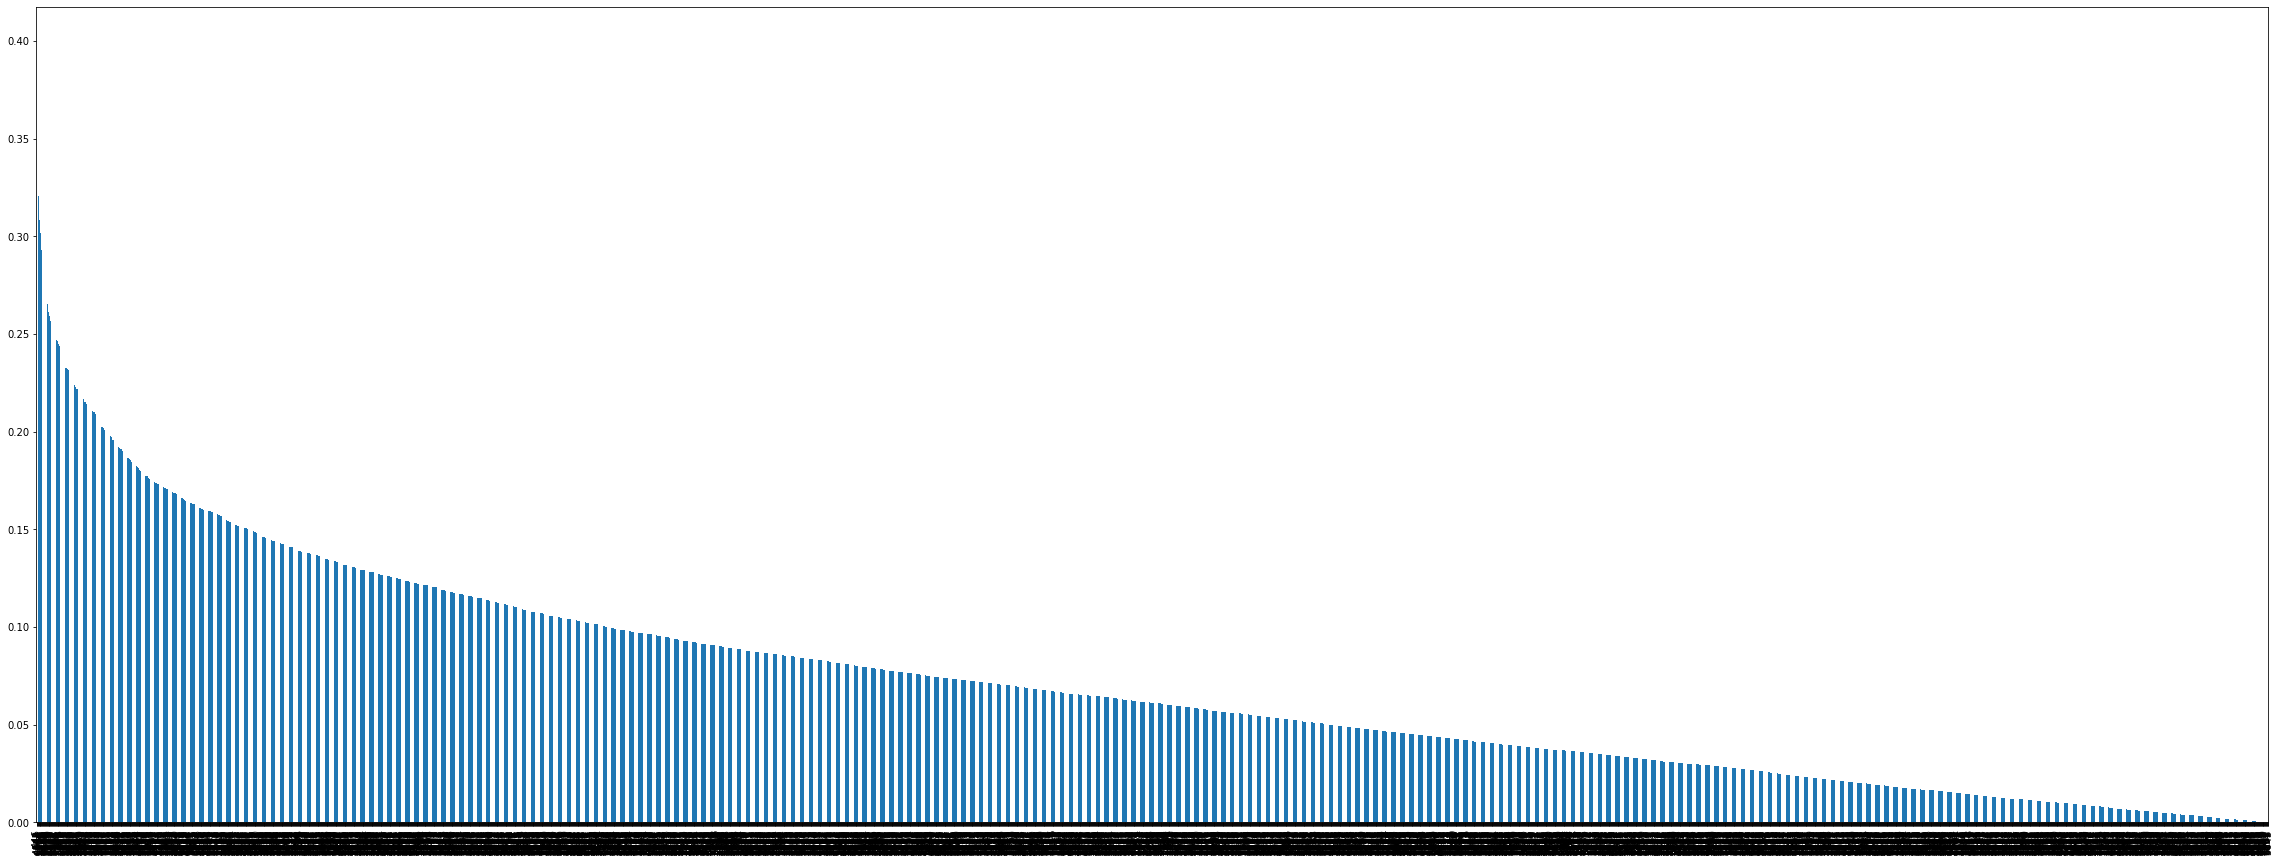

In [24]:
mutual_info=pd.Series(mutual_information)
mutual_info.index=required_features_t
mutual_info.sort_values(ascending=False,inplace=True)
mutual_info.plot.bar(figsize=(40,15))

In [25]:
required_indices = (-mutual_information).argsort()[:number_of_features_required_2]
selected_features_mi=[]
selected_indices=[]
for i in range(number_of_features_required_2):
    required_indices[i] = required_indices[i] + 1
    selected_indices.append(required_indices[i])
    selected_features_mi.append(feature_name[required_indices[i]])
    print('Selected Feature '+str(i+1)+ ' is : ', feature_name[required_indices[i]])

Selected Feature 1 is :  U71207_at
Selected Feature 2 is :  L43631_at
Selected Feature 3 is :  D83657_at
Selected Feature 4 is :  U70451_at
Selected Feature 5 is :  X16064_at
Selected Feature 6 is :  HG2668-HT2764_at
Selected Feature 7 is :  U89336_cds8_at
Selected Feature 8 is :  K01884_at
Selected Feature 9 is :  U22377_at
Selected Feature 10 is :  U20362_at
Selected Feature 11 is :  L07738_at
Selected Feature 12 is :  L14927_at
Selected Feature 13 is :  X52008_at
Selected Feature 14 is :  S82185_at
Selected Feature 15 is :  HG3492-HT3686_at
Selected Feature 16 is :  U90911_at
Selected Feature 17 is :  U51432_at
Selected Feature 18 is :  U10991_at
Selected Feature 19 is :  HG3123-HT3299_at
Selected Feature 20 is :  U34962_at
Selected Feature 21 is :  D85815_at
Selected Feature 22 is :  U60276_at
Selected Feature 23 is :  X04327_at
Selected Feature 24 is :  L29339_at
Selected Feature 25 is :  D82344_at
Selected Feature 26 is :  X68242_at
Selected Feature 27 is :  K02574_at
Selected Fe

Selected Feature 903 is :  U79266_at
Selected Feature 904 is :  D86985_at
Selected Feature 905 is :  U09607_at
Selected Feature 906 is :  X55448_cds2_at
Selected Feature 907 is :  AF000231_at
Selected Feature 908 is :  U50136_rna1_at
Selected Feature 909 is :  M98447_rna1_at
Selected Feature 910 is :  J03798_at
Selected Feature 911 is :  M12759_at
Selected Feature 912 is :  M81637_at
Selected Feature 913 is :  M86934_at
Selected Feature 914 is :  M27826_at
Selected Feature 915 is :  D63482_at
Selected Feature 916 is :  U36500_at
Selected Feature 917 is :  U60644_at
Selected Feature 918 is :  M59499_at
Selected Feature 919 is :  HG4297-HT4567_at
Selected Feature 920 is :  U41635_at
Selected Feature 921 is :  S79522_at
Selected Feature 922 is :  K03195_at
Selected Feature 923 is :  U62739_at
Selected Feature 924 is :  M54995_at
Selected Feature 925 is :  X71877_at
Selected Feature 926 is :  U50523_at
Selected Feature 927 is :  D14689_at
Selected Feature 928 is :  U19948_at
Selected Featu

Selected Feature 1579 is :  X51730_at
Selected Feature 1580 is :  M63256_at
Selected Feature 1581 is :  U84720_at
Selected Feature 1582 is :  M35252_at
Selected Feature 1583 is :  M28209_at
Selected Feature 1584 is :  HG4074-HT4344_at
Selected Feature 1585 is :  X78933_at
Selected Feature 1586 is :  S83308_at
Selected Feature 1587 is :  D88460_at
Selected Feature 1588 is :  M95549_at
Selected Feature 1589 is :  U23946_at
Selected Feature 1590 is :  M86808_at
Selected Feature 1591 is :  U28249_at
Selected Feature 1592 is :  X13482_at
Selected Feature 1593 is :  U58334_at
Selected Feature 1594 is :  U28131_at
Selected Feature 1595 is :  M94893_at
Selected Feature 1596 is :  U68494_at
Selected Feature 1597 is :  D29013_at
Selected Feature 1598 is :  HG4234-HT4504_at
Selected Feature 1599 is :  M76766_at
Selected Feature 1600 is :  U73377_at
Selected Feature 1601 is :  M86852_at
Selected Feature 1602 is :  X53414_at
Selected Feature 1603 is :  X65724_at
Selected Feature 1604 is :  X89398_c

In [26]:
required_features_mi = selected_features_mi
print('Length of required features : '+str(len(required_features_mi)))
print(required_features_mi)

Length of required features : 2356
['U71207_at', 'L43631_at', 'D83657_at', 'U70451_at', 'X16064_at', 'HG2668-HT2764_at', 'U89336_cds8_at', 'K01884_at', 'U22377_at', 'U20362_at', 'L07738_at', 'L14927_at', 'X52008_at', 'S82185_at', 'HG3492-HT3686_at', 'U90911_at', 'U51432_at', 'U10991_at', 'HG3123-HT3299_at', 'U34962_at', 'D85815_at', 'U60276_at', 'X04327_at', 'L29339_at', 'D82344_at', 'X68242_at', 'K02574_at', 'D29833_at', 'M96739_at', 'D12763_at', 'M33882_at', 'X63422_at', 'U90904_at', 'M80244_at', 'U37431_at', 'U68488_at', 'L34820_at', 'X07024_at', 'D78275_at', 'U03187_at', 'HG3934-HT4204_at', 'X81882_at', 'AJ001421_at', 'M94630_at', 'U48263_at', 'D14822_at', 'X64594_at', 'U65011_at', 'L02648_at', 'HG2714-HT2810_at', 'X12447_at', 'U40370_at', 'X82324_at', 'D80004_at', 'U43318_at', 'M83088_at', 'L02426_at', 'U77664_at', 'X02158_rna1_at', 'D50582_at', 'X64330_at', 'U01317_cds1_at', 'X77737_at', 'D82070_at', 'U96629_rna2_at', 'X13973_at', 'U16258_at', 'X82200_at', 'U85193_at', 'X69978_at

In [27]:
X_train2 = X_train[required_features_mi]
X_train2.head()

,U71207_at,L43631_at,D83657_at,U70451_at,X16064_at,HG2668-HT2764_at,U89336_cds8_at,K01884_at,U22377_at,U20362_at,...,L11372_at,D49738_at,J04501_at,U79725_at,L19067_at,X52947_at,D29677_at,U24186_at,M60721_at,U09579_at
22,0.581763,-0.894162,0.140292,-0.638917,0.021146,-0.851015,0.143645,-0.781729,-0.557513,0.623605,...,0.025351,-0.103104,-1.082685,-0.153443,-0.993034,-0.064236,-0.554589,0.624879,-0.280112,-1.333522
41,-0.251760,0.426844,0.577287,-0.366763,-0.741740,-0.847999,0.513545,-0.223705,-0.294781,-0.116392,...,-1.184510,-0.304092,-0.383578,-1.136029,-0.752146,-0.219266,0.315224,-1.522014,0.959870,-0.155237
50,-0.343693,0.446794,0.454928,-0.537079,-0.214768,-0.470984,0.428650,0.246209,0.258832,0.335828,...,2.231568,-0.022709,1.529029,-0.255922,0.453404,1.353181,0.219989,0.223054,0.522041,0.575868
38,-0.460141,-0.366900,-4.325793,0.140672,2.446358,1.996199,2.896675,2.566412,-2.330951,-0.280836,...,0.015184,-1.153265,-0.958763,3.041466,0.837493,-0.189737,-1.221234,2.404389,-3.025331,0.774615
61,-0.558202,-0.932638,-2.455456,-0.960234,2.171428,3.229791,-1.220743,-0.341184,-0.135265,-2.487124,...,-2.252034,-1.226961,-0.601026,2.272879,-0.277031,-0.123295,-2.122791,-1.154631,-1.350716,-0.826008


# Selection of features using F Classification 

In [28]:
f_start_time = time.time()
def correlation(df, threshold):
    correlation_set = set()  
    correlation_matrix = df.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold: #Here, we are interested in absolute coeff value
                column_name = correlation_matrix.columns[i] # It is storing the name of column
                correlation_set.add(column_name)
    return correlation_set


selected_features_fc = correlation(X_train2, 0.5)
print('Time taken by F-Classification is :'+str(time.time() - f_start_time)+' seconds')

Time taken by F-Classification is :56.378201723098755 seconds


In [29]:
print('Length of selected features : '+str(len(selected_features_fc)))

Length of selected features : 2252


In [30]:
selected_features_fc = list(selected_features_fc)
print('Selected features using F classification')
print(selected_features_fc)

Selected features using F classification
['L43821_at', 'U09770_at', 'HG1111-HT1111_at', 'X07979_at', 'U20285_at', 'U39576_at', 'U81006_at', 'X72012_at', 'M29458_at', 'U33761_at', 'X51408_at', 'M30818_at', 'X55889_at', 'M58600_rna1_at', 'U14407_at', 'M58297_at', 'HG2788-HT2896_at', 'M59830_at', 'HG4074-HT4344_at', 'D50911_at', 'M95623_cds1_at', 'L39061_at', 'U47007_at', 'U03270_at', 'U20860_at', 'L13329_at', 'M14565_at', 'D63412_at', 'U42387_at', 'D79997_at', 'D78261_at', 'S74683_at', 'M74719_at', 'U52427_rna1_at', 'X80907_at', 'U91327_at', 'L17328_at', 'L36645_at', 'X82103_at', 'L20852_at', 'X67698_at', 'HG2992-HT5186_at', 'M95610_at', 'HG2415-HT2511_at', 'M23379_at', 'M17885_at', 'J03824_at', 'D82343_at', 'U27655_at', 'X69150_at', 'M20777_at', 'U79248_at', 'M60091_at', 'U66088_at', 'M33518_at', 'X59871_at', 'X05232_at', 'U16258_at', 'X87176_at', 'L39060_at', 'U41635_at', 'L05779_at', 'S77393_at', 'M34065_at', 'M86852_at', 'X05997_at', 'M92439_at', 'U71374_at', 'X59727_at', 'U51678_at'

In [31]:
required_features_fc = selected_features_fc[:number_of_features_required_3]
print('Length of required features : '+str(len(required_features_fc)))

Length of required features : 1343


In [32]:
X_train3 = X_train[required_features_fc]
X_train3.head()

,L43821_at,U09770_at,HG1111-HT1111_at,X07979_at,U20285_at,U39576_at,U81006_at,X72012_at,M29458_at,U33761_at,...,L15309_at,U51432_at,D38145_at,X62535_at,M29877_at,M96759_rna1_at,X04143_at,X01715_at,M22092_at,U83411_at
22,-0.200123,-0.703784,0.784344,1.844414,-0.686304,0.974659,2.687586,-0.149223,-0.160412,0.877854,...,-0.092474,0.067521,-0.344638,-0.765639,0.487866,-0.779916,1.353287,-0.350835,0.483373,0.120427
41,-0.361704,-0.834959,-0.540967,1.469088,-0.181265,1.110329,1.125973,1.475020,-0.205051,-0.485366,...,-0.753771,0.118707,-0.384297,0.853380,0.060637,0.195582,0.406949,-1.422374,-0.270267,0.370543
50,-0.248597,-0.638481,0.208122,0.868946,0.303368,-0.104930,1.550403,0.981491,-0.133959,0.804450,...,-0.330849,0.094333,-0.344638,-1.062572,-1.047387,-0.333974,1.531966,0.530307,0.284009,-0.219731
38,-1.185768,-0.465286,-1.126793,-0.299629,0.362034,-3.020397,-1.023035,-3.133567,-0.185211,0.647155,...,0.292002,0.184519,1.864903,-0.291449,-0.347655,-0.399007,-3.954148,2.230600,-0.609842,-0.728539
61,-1.309647,-0.804862,-1.687008,-0.616266,-0.619986,-3.698748,-0.947820,-0.700678,-0.144706,2.461286,...,1.068642,-0.931837,3.502230,0.024677,-0.162908,-0.863530,0.340771,1.110354,-1.451114,-1.158739


In [33]:
X_test3 = X_test[required_features_fc]
X_test3.head()

,L43821_at,U09770_at,HG1111-HT1111_at,X07979_at,U20285_at,U39576_at,U81006_at,X72012_at,M29458_at,U33761_at,...,L15309_at,U51432_at,D38145_at,X62535_at,M29877_at,M96759_rna1_at,X04143_at,X01715_at,M22092_at,U83411_at
48,-0.108560,0.271788,-0.310478,1.465302,-0.081788,1.445175,-0.503691,0.911980,-0.158759,-0.013482,...,-0.822977,0.594011,-1.143473,-0.747574,-0.543488,-0.352555,-0.023205,-1.077002,0.397931,0.404845
74,1.178703,-0.100156,0.067267,-0.168525,-0.020571,-0.177095,-0.632632,-0.814213,-0.181905,0.364025,...,-0.200127,-0.281036,0.097270,1.151442,0.183032,0.139840,0.307682,-1.103569,0.084645,0.273355
59,0.117653,-0.140474,-0.544168,-0.661229,-0.364916,-0.431116,-0.201039,-1.428228,-0.136439,-0.390989,...,0.899473,0.289329,0.074608,-0.056612,-0.328257,0.149130,-0.281297,0.698565,0.222666,-1.015815
54,1.044052,-0.343765,4.680244,3.462149,-1.696381,1.514453,2.483430,0.962955,-0.182732,0.500347,...,0.415034,0.708572,-0.180339,-0.132257,0.167790,0.399972,-0.009970,-0.014319,0.472419,0.391982
34,-1.718986,-0.656653,-1.174811,-0.737430,1.175707,0.085586,-1.562078,-1.351766,-0.080228,-5.424417,...,0.184348,0.672010,1.734597,-0.713704,-0.981340,-1.123663,0.195181,1.880800,-0.907793,-1.587510


In [34]:
X_test3.shape

(16, 1343)

In [35]:
y_train3 = np.array([a+1 for a in y_train]) 
print(y_train3)

y_test3 = np.array([a+1 for a in y_test])

print(y_test3)

[1 1 1 1 2 1 2 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 2 1 1 1 2 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 1 1 1 1 2 2 2 1 1]
[1 2 2 1 1 1 2 1 1 2 1 2 1 1 1 1]


# KNN Classifier

In [36]:
temp_fscore=0
temp_cm = np.zeros([2,2])

sum =0
for i in range(1,20):
    classfier = KNeighborsClassifier(n_neighbors=i)
    classfier.fit(X_train3, y_train3) 
    print('KNN Classfier for '+str(i)+ ' neighbors:')
    y_train_prediction = classfier.predict(X_train3)
    print('Training accuracy on selected features for '+str(i)+ ' neighbors: %.4f' % (100*acc(y_train3, y_train_prediction)))

    y_test_prediction = classfier.predict(X_test3)
    print('Testing accuracy on selected features for '+str(i)+ ' neighbors: %.4f' %(100*acc(y_test3, y_test_prediction)))
    
     
    f_score_knn = f1_score(y_test3, y_test_prediction,average='micro')
    temp_fscore= temp_fscore + f_score_knn
    
    cm = confusion_matrix(y_test3, y_test_prediction)
    cm= np.array(cm)
    temp_cm = temp_cm + cm
    
    sum = sum + 100*acc(y_test3, y_test_prediction)
    if i !=1:
        if max_test_accuracy < (100*acc(y_test3, y_test_prediction)):
            max_test_accuracy = (100*acc(y_test3, y_test_prediction))
            max_y_test_prediction = y_test_prediction
            index = i
    else:
        max_test_accuracy = (100*acc(y_test3, y_test_prediction))
        max_y_test_prediction = y_test_prediction
        index = i

print('Average Testing accuracy obtained on selected features by KNN Classifier: %.4f' % (sum/19))                        
print('Maximum Testing accuracy obtained on selected features for '+str(index)+ ' neighbors: %.4f' % max_test_accuracy)                   

KNN Classfier for 1 neighbors:
Training accuracy on selected features for 1 neighbors: 100.0000
Testing accuracy on selected features for 1 neighbors: 81.2500
KNN Classfier for 2 neighbors:
Training accuracy on selected features for 2 neighbors: 91.8033
Testing accuracy on selected features for 2 neighbors: 81.2500
KNN Classfier for 3 neighbors:
Training accuracy on selected features for 3 neighbors: 95.0820
Testing accuracy on selected features for 3 neighbors: 87.5000
KNN Classfier for 4 neighbors:
Training accuracy on selected features for 4 neighbors: 90.1639
Testing accuracy on selected features for 4 neighbors: 87.5000
KNN Classfier for 5 neighbors:
Training accuracy on selected features for 5 neighbors: 91.8033
Testing accuracy on selected features for 5 neighbors: 87.5000
KNN Classfier for 6 neighbors:
Training accuracy on selected features for 6 neighbors: 90.1639
Testing accuracy on selected features for 6 neighbors: 81.2500
KNN Classfier for 7 neighbors:
Training accuracy on

In [37]:
cm = confusion_matrix(y_test3, max_y_test_prediction)
print('Maximum Confusion matrix :',cm)
print('Average Confusion matrix is :',(temp_cm/19))

Maximum Confusion matrix : [[11  0]
 [ 1  4]]
Average Confusion matrix is : [[10.57894737  0.42105263]
 [ 3.15789474  1.84210526]]


Confusion Matrix of KNN Classifier:


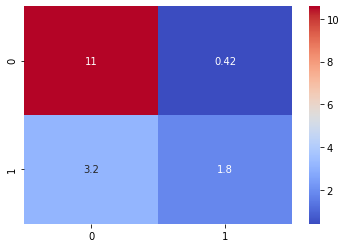

In [38]:
print('Confusion Matrix of KNN Classifier:')
sns.heatmap((temp_cm/19),annot = True,cmap='coolwarm')

In [39]:
f_score_knn = f1_score(y_test3, max_y_test_prediction,average='micro')

print('Maximum F-Score is : '+str(f_score_knn))
print('Average F-Score is : '+str(temp_fscore/19))

Maximum F-Score is : 0.9375
Average F-Score is : 0.7763157894736842


# SVM(Support Vector Machine)

In [40]:
from sklearn.svm import SVC
classfier_svc = SVC()
classfier_svc.fit(X_train3,y_train3)
print('SVM Classfier')
y_train_prediction_svc = classfier_svc.predict(X_train3)
print('Training accuracy on selected features: %.4f' % (100*acc(y_train3, y_train_prediction_svc)))

y_test_prediction_svc = classfier_svc.predict(X_test3)
print('Testing accuracy on selected features: %.4f' % (100*acc(y_test3, y_test_prediction_svc)))

SVM Classfier
Training accuracy on selected features: 98.3607
Testing accuracy on selected features: 68.7500


In [41]:
cm_svc = confusion_matrix(y_test3, y_test_prediction_svc)
print('Confusion Matrix of SVM Classifier:')
print(cm_svc)

Confusion Matrix of SVM Classifier:
[[11  0]
 [ 5  0]]


Confusion Matrix of SVM Classifier:


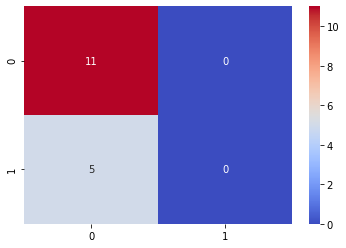

In [42]:
print('Confusion Matrix of SVM Classifier:')
sns.heatmap(cm_svc,annot = True,cmap='coolwarm', fmt = "d")

In [43]:
f_score_svc = f1_score(y_test3, y_test_prediction_svc,average='micro')

print(' F-Score of SVM Classifier is : '+str(f_score_svc))

 F-Score of SVM Classifier is : 0.6875
